In [1]:
import numpy as np

## LHC: particle momentum, geometry of a storage ring and thin lens calculation
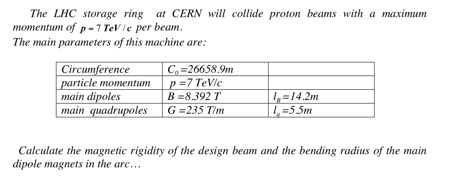

The beam rigidity is obtained in the usual way by the golden rule

\begin{equation}
B\cdot \rho [Tm]= \frac{p}{q}=\frac{1}{0.299792}p[GeV/c]
\end{equation}

In [8]:
Brho=7000/0.299792 #units: Tm
print("Brho = ", Brho)

Brho =  23349.522335485937


In [9]:
# Knowing the magnetic dipole field we get:
rho=Brho/8.392 #units: m
print("rho = ", rho)

rho =  2782.3549017499927


In [11]:
# Calculate the number of dipole magnets that needed
dipole_length = 14.2 #units: m
# The bending angle for one LHC dipole magnet is:
alpha=1e3*dipole_length/rho #units: mrad
print("Bending angle = ", alpha)

Bending angle =  5.103590484114285


In [14]:
# Since we want to have a closed storage ring we require an 
#overall beinding anlge of 2pi:
number_of_dipoles = 2*np.pi*1e3/alpha
print("Number of dipoles in LHC = ", number_of_dipoles)

Number of dipoles in LHC =  1231.130382960187


Calculate the normalized strength of the quadrupole magnets 
and compared to the focal length. 
Can this be treated as a thin lens?
\begin{equation}
k=\frac{G}{B\rho}=\frac{G}{p/q}=0.299792\frac{G[T/m]}{p[GeV/c]}
\end{equation}


In [16]:
G=235 #untis: T/m
lq=5.5 #units: m
k=0.299792*235/7000 #units:m-2
print("k = ", k)

k =  0.010064445714285714


In [17]:
focal_length=1/(k*lq)
print("Focal length = ", focal_length)

Focal length =  18.065394456855657


The focal length is bigger than the magnet length, 
so we can apply thin lens approx.

How does the matrix for such focusing magnet looks like?
\begin{equation}
M_{QF}=\begin{bmatrix}
   cos(\sqrt{|k|}\cdot l_
   q)&
   \frac{1}{\sqrt{|k|}}sin(\sqrt{|k|}\cdot l_
   q) \\
   -\sqrt{|k|}sin(\sqrt{|k|}\cdot l_
   q) & cos(\sqrt{|k|}\cdot l_
   q)
   \end{bmatrix}
\end{equation}

In [22]:
m11=np.cos(np.sqrt(k)*lq)
m12=(1/np.sqrt(k))*np.sin(np.sqrt(k)*lq)
m21=-1*np.sqrt(k)*np.sin(np.sqrt(k)*lq)
m22=m11
print("m11=m22 = ", m11)
print("m12 = ", m12)
print("m21 = ", m21)


m11=m22 =  0.8515983394892288
m12 =  5.225138910583803
m21 =  -0.05258812691517268


\begin{equation}
M_{QF}=\begin{bmatrix}
   0.8516 & 5.225 \\
   -0.0526 & 0.8516
   \end{bmatrix}
\end{equation}

In thin lens approximation the focusing quadrupole matrix is:
\begin{equation}
M_{QF}=\begin{bmatrix}
   1 & 0 \\
   \frac{-1}{|f|} & 1
   \end{bmatrix}
\end{equation}  

But we should not forget that the overall lenght of the quadrupole is
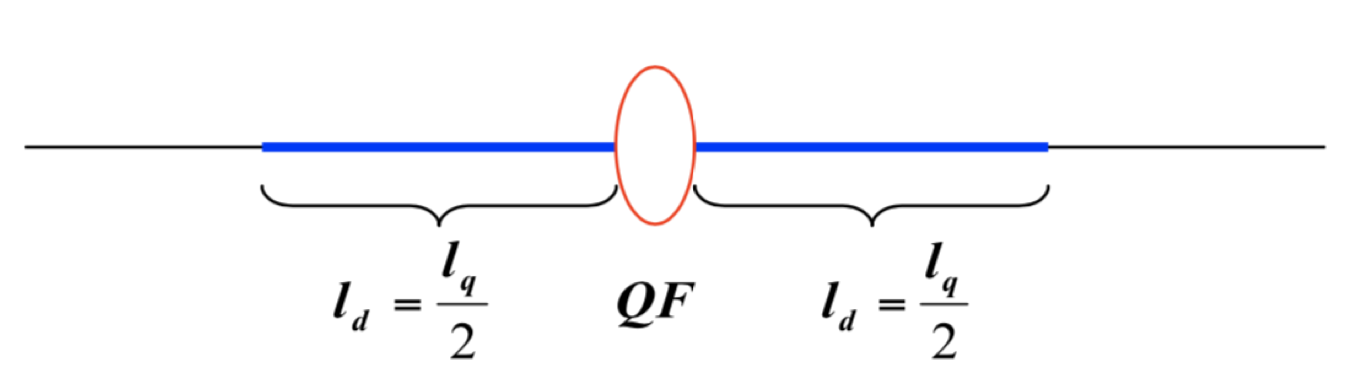

\begin{equation}
M_{QFthin}=\begin{bmatrix}
   1 & \frac{l_q}{2} \\
   0 & 1
   \end{bmatrix}
   \begin{bmatrix}
   1 & 0 \\
   \frac{-1}{f} & 1
   \end{bmatrix}
   \begin{bmatrix}
   1 & \frac{l_q}{2} \\
   0 & 1
   \end{bmatrix}
\end{equation}  

Multiplying we get:

\begin{equation}
M_{QFthin}=\begin{bmatrix}
   1-\frac{l_q}{2\cdot f} & \frac{l_q}{2}(2-\frac{lq}{2\cdot f}) \\
   \frac{-1}{f} & 1-\frac{l_q}{2\cdot f} 
   \end{bmatrix}
\end{equation}  


In [36]:
lq_half=lq/2

m11=1-(lq_half/focal_length)
m12=lq_half*(2-lq_half/focal_length)
m21=-1/focal_length
print("m11 = m22 = ", m11)
print("m12 = ", m12)
print("m21 = ", m21)
print("Focal length = ", focal_length)
print("lq/2 = ", lq_half)

m11 = m22 =  0.8477752585714285
m12 =  5.081381961071429
m21 =  -0.05535445142857143
Focal length =  18.065394456855657
lq/2 =  2.75


In [38]:
# Matrix multiplication with np.dot
m_drift=[[1,lq_half],[0,1]]
m_qf=[[1,0],[-1/focal_length,1]]
m_total=np.dot(m_drift,np.dot(m_qf,m_drift))
print(m_total)

[[ 0.84777526  5.08138196]
 [-0.05535445  0.84777526]]
